## Code

In [1]:
import sys

sys.path.append('..')

In [2]:
from finance.discountfactor import ConstantRateDiscountFactor 

r = 0.02
discount = ConstantRateDiscountFactor(r)

In [3]:
import numpy as np
from scipy.stats import norm
from maths.montecarlo.processes.brownianmotions import GeometricBrownianMotion

maturity = 5.
step = 1./360
time_grid = GeometricBrownianMotion.generate_time_grid(0, maturity, step)

x_0 = [100]
mu_s = [[0.12]]
sigma_s = [[0.2]]

gbm = GeometricBrownianMotion(time_grid, x_0, mu_s, sigma_s)

print gbm.drifts
print gbm.vols

[[ 0.12]]
[[ 0.2]]


In [4]:
t_0 = time_grid[0]
t_10 = time_grid[2]

print t_0
print t_10

0.0
0.00555555555556


In [5]:
print gbm.conditional_expectation(t_0, t_10)
print gbm.conditional_expectation(t_10, t_0)

[[ 100.]]
[[ 100.06668889]]


In [6]:
mu_v = np.tile(mu_s, len(time_grid) - 1)
sigma_v = np.tile(sigma_s, len(time_grid) - 1)

print mu_v
print sigma_v

[[ 0.12  0.12  0.12 ...,  0.12  0.12  0.12]]
[[ 0.2  0.2  0.2 ...,  0.2  0.2  0.2]]


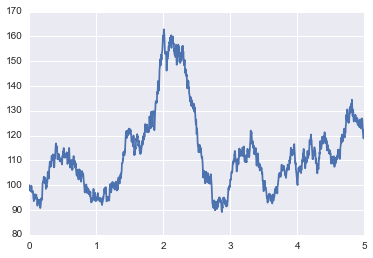

In [7]:
gbm = GeometricBrownianMotion(time_grid, x_0, mu_v, sigma_v)

import seaborn as sns
%matplotlib inline

gbm.plot()

In [8]:
gbm.drifts

array([[ 0.12,  0.12,  0.12, ...,  0.12,  0.12,  0.12]])

In [9]:
print gbm.conditional_expectation(t_0, t_10)
print gbm.conditional_expectation(t_10, t_0)

[[ 100.]]
[[ 100.06668889]]


In [10]:
cond_exp = []
for t in time_grid:
    cond_exp.append(gbm.conditional_expectation(time_grid[-1], t)[0])

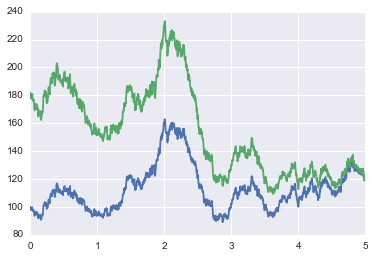

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(time_grid, gbm.values[0, :])
plt.plot(time_grid, cond_exp)
plt.show()

In [12]:
print gbm(0) * np.exp(0.12 * (time_grid[-1])) 
print gbm.conditional_expectation(time_grid[-1], 0.)

[[ 182.21188004]]
[[ 182.21188004]]
